<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#作业要求：作图查看不同性别的特征情况" data-toc-modified-id="作业要求：作图查看不同性别的特征情况-1">作业要求：作图查看不同性别的特征情况</a></span></li><li><span><a href="#一-查看数据的描述性统计信息" data-toc-modified-id="一-查看数据的描述性统计信息-2">一 查看数据的描述性统计信息</a></span></li><li><span><a href="#二-查看每个变量按性别分组统计的结果，观察哪个变量的组间差距大" data-toc-modified-id="二-查看每个变量按性别分组统计的结果，观察哪个变量的组间差距大-3">二 查看每个变量按性别分组统计的结果，观察哪个变量的组间差距大</a></span><ul class="toc-item"><li><span><a href="#1-不同组的各个变量的直方图" data-toc-modified-id="1-不同组的各个变量的直方图-3.1">1 不同组的各个变量的直方图</a></span></li><li><span><a href="#2-不同组的各个变量的箱线图" data-toc-modified-id="2-不同组的各个变量的箱线图-3.2">2 不同组的各个变量的箱线图</a></span></li></ul></li><li><span><a href="#三-了解变量两两之间的相关性，观察组间不同" data-toc-modified-id="三-了解变量两两之间的相关性，观察组间不同-4">三 了解变量两两之间的相关性，观察组间不同</a></span><ul class="toc-item"><li><span><a href="#1-绘制变量两两之间的散点图，并根据性别分组" data-toc-modified-id="1-绘制变量两两之间的散点图，并根据性别分组-4.1">1 绘制变量两两之间的散点图，并根据性别分组</a></span></li><li><span><a href="#2-分开绘制三个组的每个变量两两之间的散点图矩阵" data-toc-modified-id="2-分开绘制三个组的每个变量两两之间的散点图矩阵-4.2">2 分开绘制三个组的每个变量两两之间的散点图矩阵</a></span></li><li><span><a href="#3-计算相关系数矩阵，查看两两变量之间的线性相关性" data-toc-modified-id="3-计算相关系数矩阵，查看两两变量之间的线性相关性-4.3">3 计算相关系数矩阵，查看两两变量之间的线性相关性</a></span></li><li><span><a href="#4-分别计算三个组的相关系数矩阵" data-toc-modified-id="4-分别计算三个组的相关系数矩阵-4.4">4 分别计算三个组的相关系数矩阵</a></span></li></ul></li></ul></div>

### 作业要求：作图查看不同性别的特征情况
Use Python to visulize the abalone data set.   
You have to use charts (such as boxplots, histograms, linecharts, scatterplots, correlation plots) to compare the features (attributes) of different groups of abalone, male, female, infant. 

这次作业我主要练习了：  
1. 不同组别的变量分布查看，用直方图和盒线图（组别是通过分类变量来得到）  
2. 两个变量之间关系的查看，用散点图矩阵（变量必须是数值型，不能是分类变量）


不同性别的特征情况总结：  
1. 通过直方图，所有8个变量都是F和M类形状相似、位置相似，能与I类明显区分。位置上，8个变量都是M和F类数据更靠右；形状上，Length和Diameter是M和F类峰更尖，而WholeWeight、ShuckedWeight、VisceraWeight、ShellWeight这四个与重量有关的变量是I类峰更尖。  但是，相似的F和M，我们还是能发现些许差距，F在与M形状相似的情况下，整体都比M要位置靠右一点，即F类的各变量数值整体比M类更大一些。    
2. 通过箱线图，所有8个变量都数据主体位置都有共同特点，F和M的数据主体位置差不多，都比I高，即F和M的盒子比I的高。但是在经过统计量处理后，F和M的区别就看不出了，这点不如直方图。
3. 通过散点图矩阵和相关系数矩阵，可以看出F和M在Height与其他属性上相关性差别大，M类中Height与其他属性的线性正相关关系比对应的F类强的多。  除了Rings以外的其他属性在M类中与Height都有很强的线性正相关关系（相关系数0.8左右），而F类中相关系数只有0.5多，差距明显。

具体请见下面代码及分析。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

from pandas.plotting import scatter_matrix

### 一 查看数据的描述性统计信息 

In [2]:
# 读入数据，同时指定Sex是分类变量，Rings是整数数值变量，其他列都是浮点型数值变量
df = pd.read_csv("./abalone.txt",header=None, 
                 names=['Sex', 'Length','Diameter','Height',
                        'WholeWeight','ShuckedWeight','VisceraWeight','ShellWeight','Rings'],
                 dtype={'Sex':'category','Rings':'int'})
# 查看数据的前5行
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
# 查看分类型变量的描述性统计信息，包括总个数、取值类数、众数、众数对应的出现次数
df.describe(include='category')

,Sex
count,4177
unique,3
top,M
freq,1528


In [4]:
# 查看数值变量的描述性统计信息，包括总个数、平均值、标准差、最小值、3个四分位数、最大值
df.describe()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


因为待观察的性别是分类变量，所以，我们需要按性别分组，查看每个变量与性别的关系

### 二 查看每个变量按性别分组统计的结果，观察哪个变量的组间差距大
#### 1 不同组的各个变量的直方图
绘制不同组的各个变量的直方分布图，观察同一变量在不同组的分布情况。  
下面的表一是根据直方图总结的每个变量在三个组的直方图情况，主要从直方图位置、形状（高度、尖、左右对称）的角度来描述。  

表一：每个变量在三个组的直方图情况

| 特征          | I类形态                                    | M类形态                  | F类形态                  | 总结                                                         |
| :------------- | :------------------------------------------ | :------------------------ | :------------------------ | :------------------------------------------------------------ |
| Length        | 数据较为对称，但右半边数量略少，峰较为平缓 | 峰靠右（负偏态），且集中         | 峰靠右（负偏态），且集中         | M和F类数据分布位置都靠右、形状都比较尖，与I类有明显区别      |
| Diameter      | 数据较为对称                               | 峰靠右（负偏态），且集中         | 峰靠右（负偏态），且集中         | 同Length      |
| Height        | 峰偏左（正偏态），峰尖                             | 峰靠左（正偏态），峰尖，且峰更高 | 峰靠左（正偏态），峰尖，且峰更高 | M和F类相似，I类比F和M更偏左，三类数据中有非常大的异常值      |
| WholeWeight   | 峰偏左（正偏态），峰高且尖                         | 数据较为对称             | 数据较为对称             | M和F类形状相似，而I类数据分布位置更靠左、峰的形状更尖更高，与M和F类有明显区别 |
| ShuckedWeight | 峰偏左（正偏态），峰高且尖                         | 数据较为对称             | 数据较为对称             | 同WholeWeight |
| VisceraWeight | 峰偏左（正偏态），峰高且尖                         | 数据较为对称             | 数据较为对称             | 同WholeWeight |
| ShellWeight   | 峰偏左（正偏态），峰高且尖                         | 数据较为对称             | 数据较为对称             | 同WholeWeight |
| Rings         | 峰较为平缓                                 | 峰较为平缓               | 峰较为平缓               | 三类的形状相似，但F和M类的整体位置更靠右                     |

看完单个变量的分布情况后，我们还发现不同变量组间分布的异同：
- 所有8个变量都是F和M类形状相似、位置相似，能与I类明显区分。但是，相似的F和M，我们还是能发现些许差距，F在与M形状相似的情况下，整体都比M要位置靠右一点，即F类的各变量数值整体比M类更大一些。
- WholeWeight、ShuckedWeight、VisceraWeight、ShellWeight这四个与重量有关的变量在三个组间的分布的差异最为相似，都是I类数据分布位置更靠左、峰的形状更尖更高。
- Rings变量是这8个变量中唯一一个三个类别的分布形状相似，只是位置有些差异的，都接近正态分布。

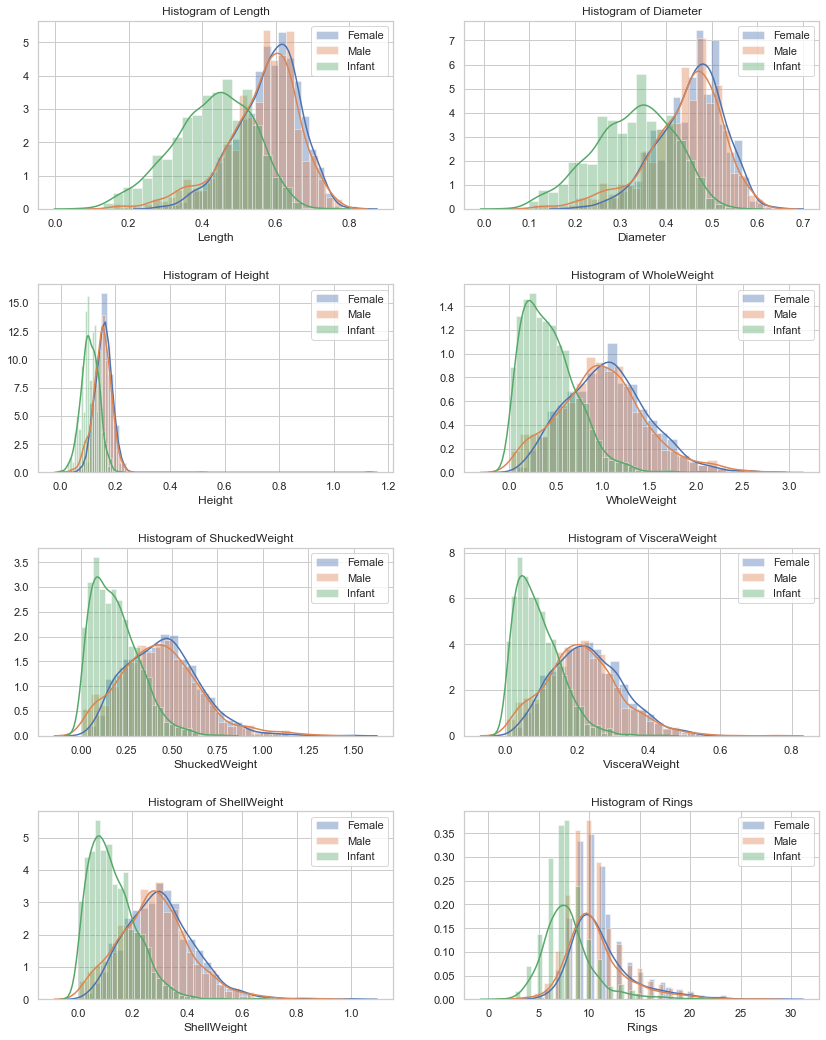

In [5]:
# 按性别分成3组，在一个子图里用不同颜色绘制一个变量不同组的直方图，共有8个子图
# 注意，不分组的每个变量的直方图在后面的散点图矩阵的对角线绘制，这里没有
df_F = df[df.Sex=='F']    # Female组
df_M = df[df.Sex=='M']    # Male组
df_I = df[df.Sex=='I']    # Infant组

j=0    # 辅助控制子图位置
fig = plt.figure(figsize=(14, 18))    # 设置大图的尺寸
for F in df.drop(['Sex'],axis=1).columns:    # 遍历除了Sex以外的所有特征，每个变量都对应一个子图
    j+=1
    ax = fig.add_subplot(4,2,j)                            # 子图位置
    ax.set_title(f'Histogram of {F}')                      # 子图标题
    ax = sns.distplot(df_F[F], kde=True,label='Female')    # 绘制F组的直方图
    ax = sns.distplot(df_M[F], kde=True,label='Male')      # 绘制M组的直方图
    ax = sns.distplot(df_I[F], kde=True,label='Infant')    # 绘制I组的直方图
    plt.legend()    # 显示图例
plt.subplots_adjust(wspace =0.2, hspace =0.4)              # 设置子图之间的间距
plt.show()

#### 2 不同组的各个变量的箱线图
绘制不同类别的各个变量的箱线图，观察同一变量在不同组的分布和异常值情况。与直方图相比，箱线图的绘制是根据统计值，而不是最原始的数据，所以更方便看异常值，但是查看数据点时会没有直方图那么直观。  
下表是根据箱线图总结的每个变量在三个组的分布和异常值，主要从数据偏态、数据集中程度以及数据主体位置的角度来描述。
- 数据集中程度：我们一是看箱子的长度，即上下四分位数的距离，箱子越短说明数据越集中；二是看”胡须“长度，须线越短说明数据越集中
- 数据偏态：我们一是看中位数线偏离上下四分位数的中心有多远，越远就偏态越强；二是看异常值在哪侧，来区分右偏（大的一侧）还是左偏（小的一侧）
- 数据主体位置：我们是看包含一半数据的箱体的位置，即不同组的变量值的大小粗略比较

表二：每个变量在三个组的箱线图情况

| 特征          | 数据主体位置                                | 数据偏态                             | 数据主体位置                            |
| :------------- | :------------------------------------------- | :------------------------------------ | :------------------------------- |
| Length        | F和M集中程度差不多，而I类相比之下没那么集中 | F和M都左偏                           | F和M的数据主体位置差不多，都比I高 |
| Diameter      | 同Length                                    | 同Length                             | 同Length                        |
| Height        | F最集中，M和L相比之下没那么集中             | F和M都右偏，但F和M都有非常大的异常值 | F和M的数据主体位置差不多，都比I高 |
| WholeWeight   | F和M集中程度差不多，但都不如I类集中         | 三类都右偏                           | F和M的数据主体位置差不多，都比I高 |
| ShuckedWeight | 同WholeWeight                               | 同WholeWeight                        | 同WholeWeight                   |
| VisceraWeight | 同WholeWeight                               | 同WholeWeight                        | 同WholeWeight                   |
| ShellWeight   | 同WholeWeight                               | 同WholeWeight                        | 同WholeWeight                   |
| Rings         | 三类的集中程度差不多，都较为集中            | 三类都右偏                           | F和M的数据主体位置差不多，都比I高 |



看完单个变量的分布情况后，我们还发现不同变量组间分布的异同：
- 所有8个变量都数据主体位置都有共同特点，F和M的数据主体位置差不多，都比I高，即F和M的盒子比I的高
- 通过统计量的箱线图，我们更难看出F和M的区别，这点不如直方图

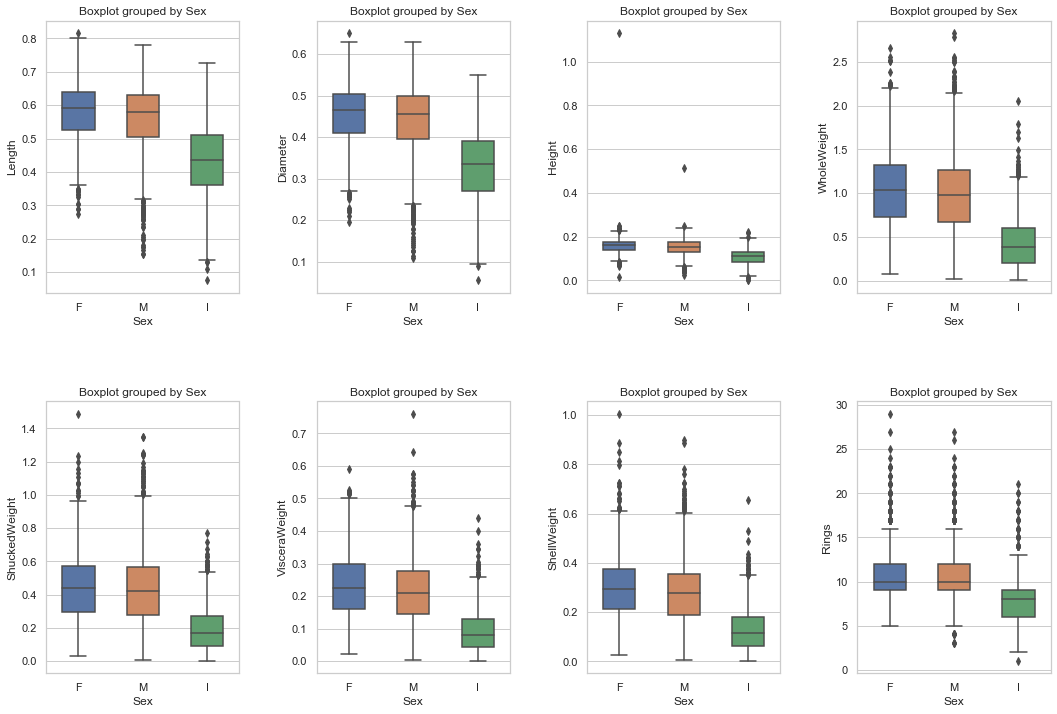

In [6]:
# 箱线图 pd效果不如sns，太简单
# df.boxplot(column=['Length'],by="Sex",figsize=(6,5)) 

# 在一个子图里用不同颜色绘制一个变量不同组的箱线图，共有8个子图
# 同上面直方图的注释，不写了
j=0
fig = plt.figure(figsize=(18, 12))
for F in df.drop(['Sex'],axis=1).columns:
    j+=1
    ax = fig.add_subplot(2,4,j)
    ax.set_title('Boxplot grouped by Sex') 
    ax = sns.boxplot(x="Sex", y=F, data=df, width = 0.5,order=['F','M','I'])
plt.subplots_adjust(wspace =0.4, hspace =0.4)
plt.show()

### 三 了解变量两两之间的相关性，观察组间不同
#### 1 绘制变量两两之间的散点图，并根据性别分组
F是红色，M是蓝色，I是绿色  
绿色的点集中在坐标数值小的位置，红蓝点混合，看不出红蓝点的区别，所以下一步分别画出三个组的散点图矩阵，对比同一特征对位置的散点图形状

In [7]:
# 散点图矩阵 sns效果不如pd：sns的对角线直方图可以分组，散点图可以绘制曲线图，但是散点图坐标弱
# sns.pairplot(df,
#              hue='Sex',
#              hue_order = ['I','F','M'],
#              markers=[".", ".", "."],
#              kind="reg",    # 将线性回归模型拟合到散点图
#              palette=dict(F="r", I="g",M="b"), 
#              diag_kind="hist")   # 对角线上绘制直方图

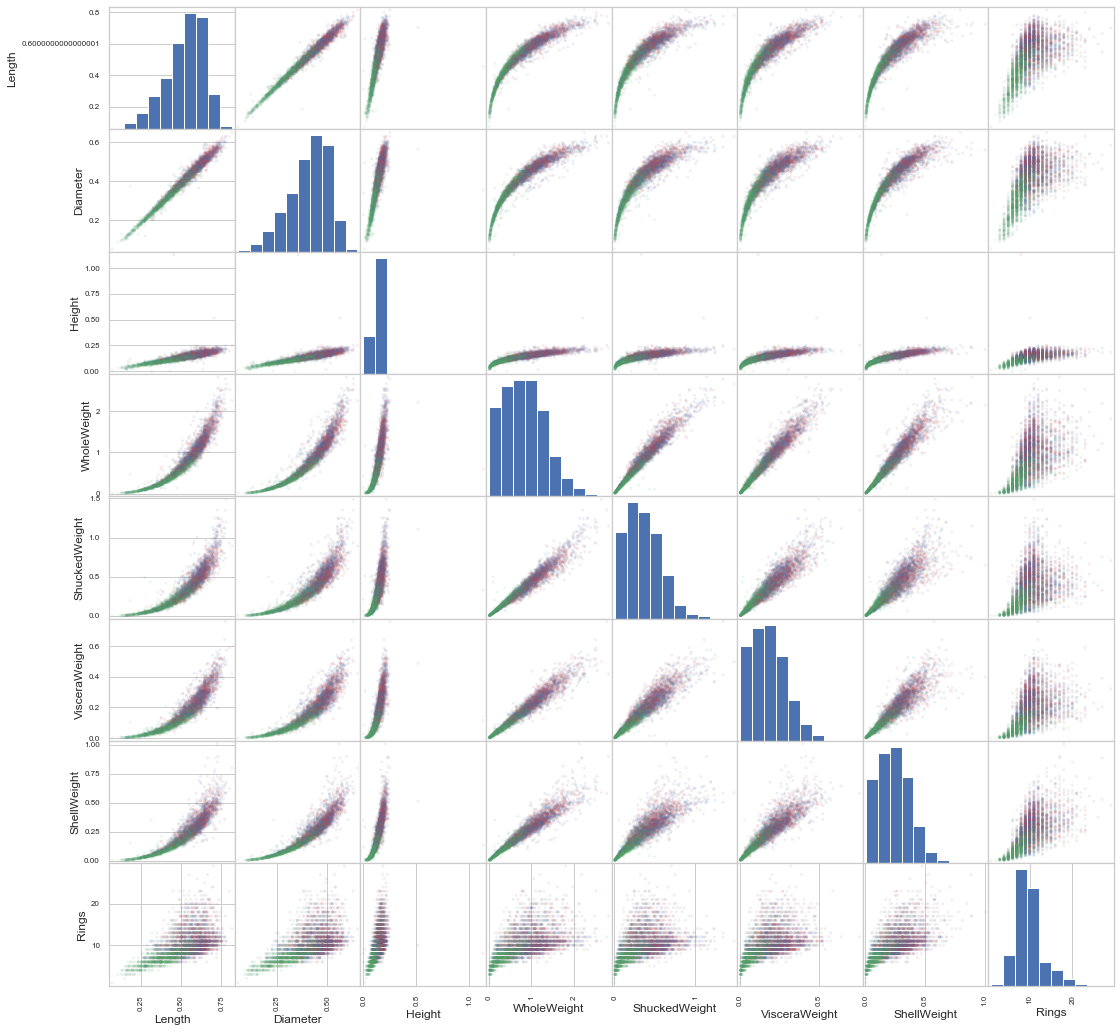

In [8]:
# 按性别分组再绘制散点图矩阵，F是红色，M是蓝色，I是绿色
# 对角线是单个变量的直方图
p = scatter_matrix(df, 
                    marker='.',    # 最小的点，因为我们数据点太多了
                    c = df.Sex.map({'I':"g", 'F':"r", 'M':"b"}).astype('category'),    # 利用color来分组，类别指定颜色
                    alpha=0.1,    # 透明度
                    figsize=(18,18))

#### 2 分开绘制三个组的每个变量两两之间的散点图矩阵
- 对比下面的F和M类的散点图矩阵，我们发现，只有Height-Rings的散点图二者差别较大，但也可能是x坐标轴压缩导致的，所以下一步仔细查看Height-Rings在不同组的散点图趋势。  
- I类的散点图矩阵和F、M类的散点图矩阵有较大的差别，主要是数据分布位置，和紧凑程度。如Rings与其他变量的散点图，明显I类的更集中。但因为I与F、M的区别前面已分析较多，这里不再深入比较了，着重看能不能区分F和M。  
- 所以，进行下一步，查看Height-Rings。

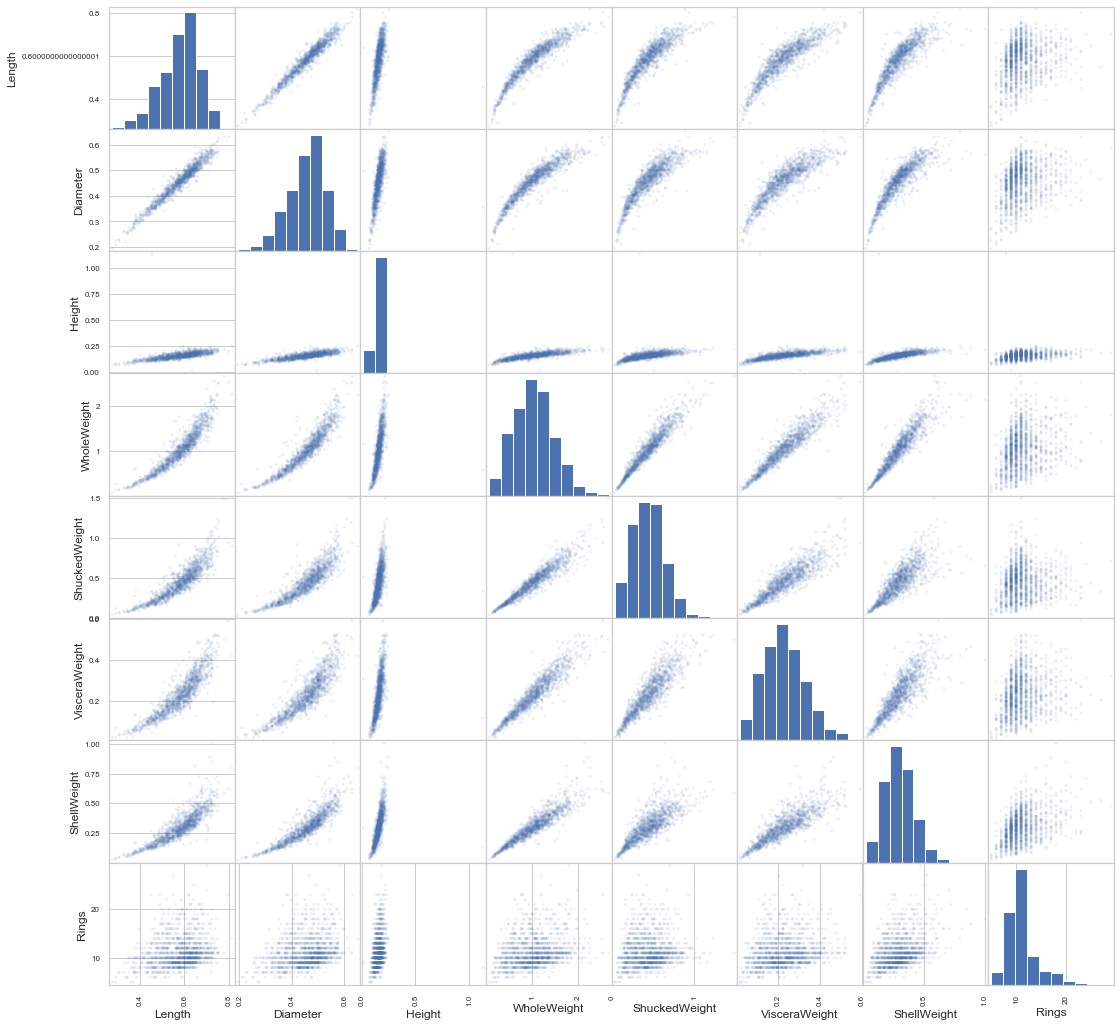

In [9]:
# 绘制F类的散点图矩阵
p = scatter_matrix(df_F, marker='.', alpha=0.1, figsize=(18,18))

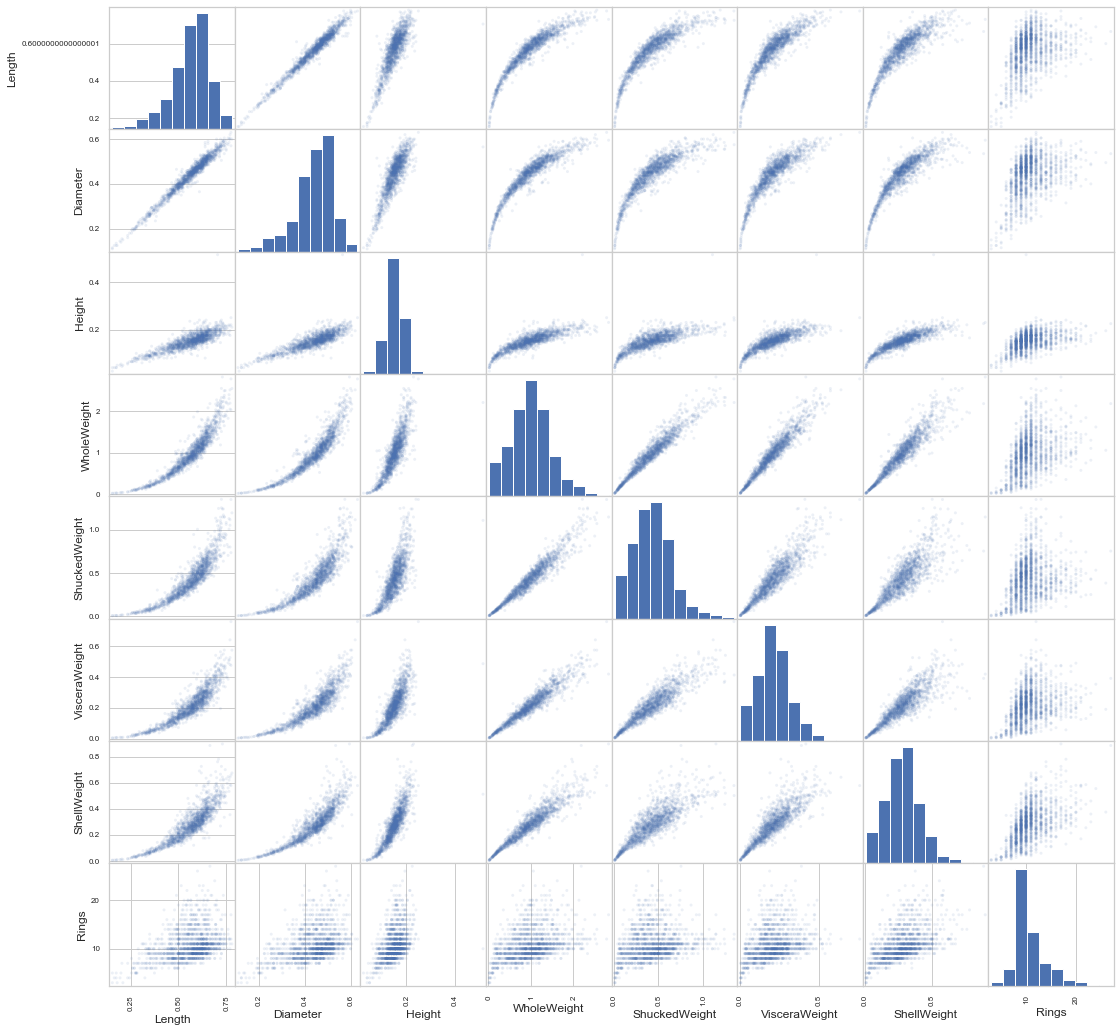

In [10]:
# 绘制M类的散点图矩阵
p = scatter_matrix(df_M, marker='.', alpha=0.1, figsize=(18,18))

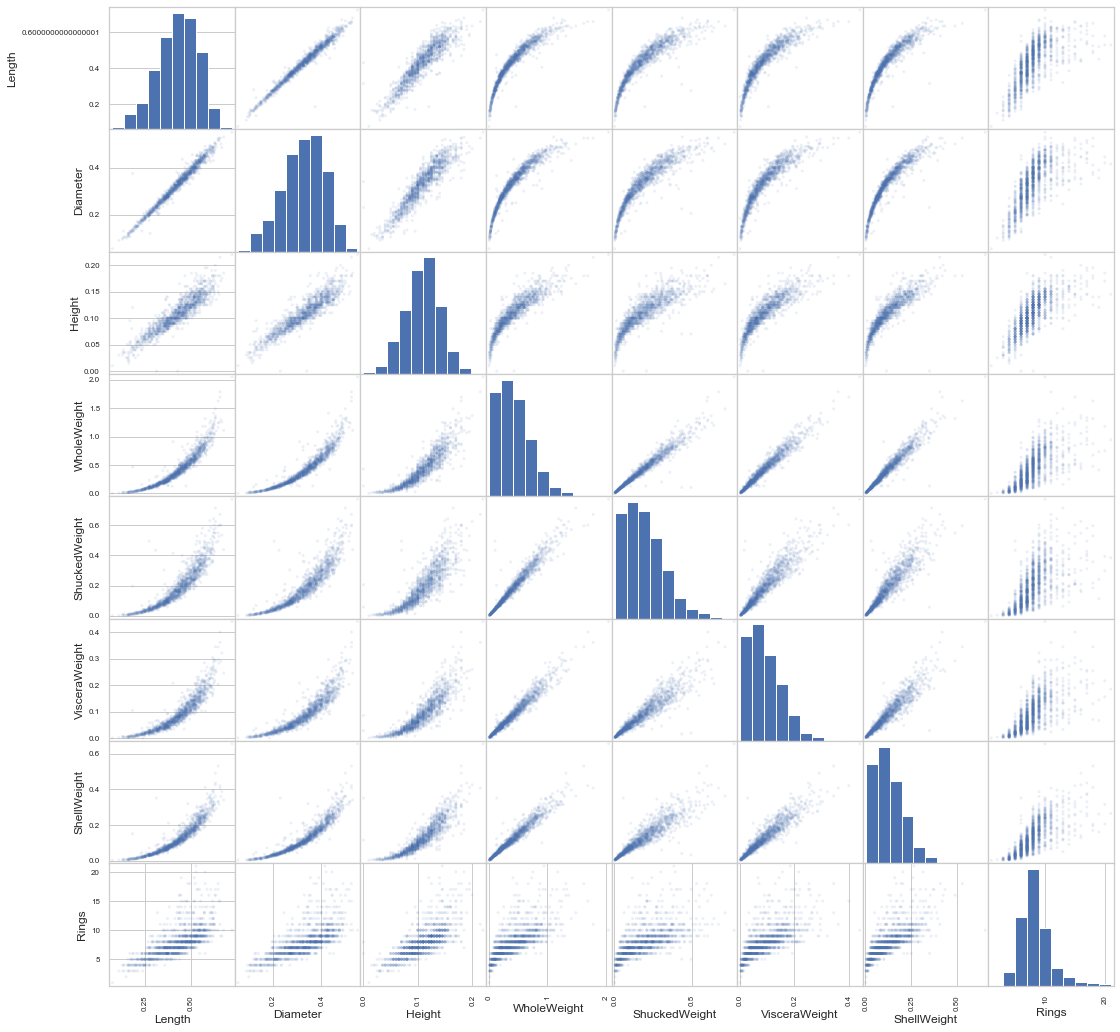

In [11]:
# 绘制I类的散点图矩阵
p = scatter_matrix(df_I, marker='.', alpha=0.1, figsize=(18,18))

下面对Height-Rings的散点图进行仔细查看，我们在三个子图中分别绘制了这个属性对的散点图，也绘制了趋势线。  
我们发现果然F和M组在上面的散点图矩阵的图形区别只是因为横坐标范围受到过大异常值的影响，导致看上去不一样，实际上F和M组在Height-Rings属性上还是分布类似，不能用这个属性对来对F和M进行区分。  
那么，我们想着借助相关系数数值来看每个组在每个属性对上的相关性的区别，下一步进行。

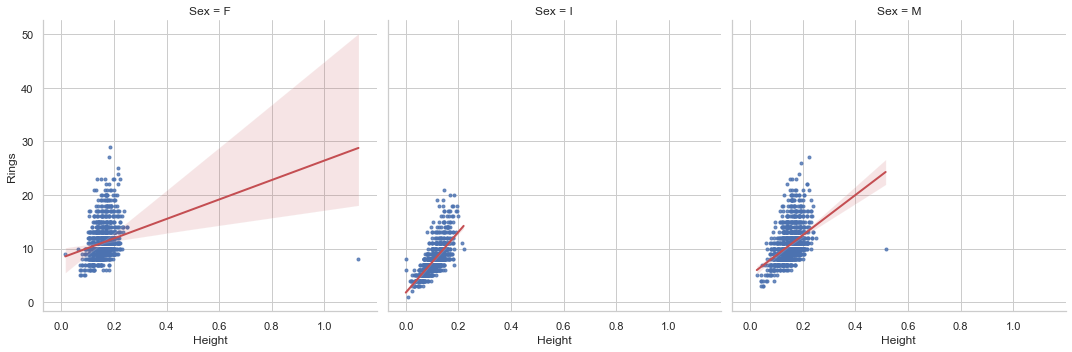

In [12]:
sns.lmplot(x='Height',y='Rings',col='Sex',markers=["."], data=df,line_kws={"linewidth": 2, "color": "r"})

#### 3 计算相关系数矩阵，查看两两变量之间的线性相关性
其实，我们最想看的是性别变量与其他变量的相关性，但是性别变量是分类变量，数值大小没有含义，不能进行相关系数计算。所以只能查看每个组在每个属性对上的相关性的区别，来间接得到一些性别变量与其他变量的关系了。  
首先不按性别分组进行查看，我们发现除了Rings，其他变量之间大部分都具有较高的线性相关性，尤其是重量相关的四个变量。

In [13]:
# 计算数值变量的相关系数矩阵
df.corr()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
WholeWeight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
ShuckedWeight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
VisceraWeight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
ShellWeight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


#### 4 分别计算三个组的相关系数矩阵
然后分别计算不同性别组下变量两两之间的相关系数，我们发现可以了一些可以区分F和M规律。
- F和M在Height与其他属性上相关系数差别大，M类中Height与其他属性的线性正相关关系比对应的F类强的多。  
- 除了Rings以外的其他属性在M类中与Height都有很强的线性正相关关系（相关系数0.8左右），而F类中相关系数只有0.5多，差距明显。

In [14]:
# 计算F组的相关系数矩阵
df_F.corr()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
Length,1.000000,0.971081,0.553494,0.929116,0.892259,0.890732,0.864876,0.230610
Diameter,0.971081,1.000000,0.562149,0.925641,0.878953,0.878164,0.876235,0.265888
Height,0.553494,0.562149,1.000000,0.583747,0.531077,0.550720,0.580622,0.233904
WholeWeight,0.929116,0.925641,0.583747,1.000000,0.949567,0.939944,0.923708,0.266759
ShuckedWeight,0.892259,0.878953,0.531077,0.949567,1.000000,0.890135,0.801906,0.094848
VisceraWeight,0.890732,0.878164,0.550720,0.939944,0.890135,1.000000,0.839690,0.211615
ShellWeight,0.864876,0.876235,0.580622,0.923708,0.801906,0.839690,1.000000,0.405907
Rings,0.230610,0.265888,0.233904,0.266759,0.094848,0.211615,0.405907,1.000000


In [15]:
# 计算M组的相关系数矩阵
df_M.corr()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
Length,1.000000,0.981907,0.832620,0.918292,0.885824,0.888029,0.870712,0.366646
Diameter,0.981907,1.000000,0.840801,0.913128,0.873510,0.877113,0.879612,0.388910
Height,0.832620,0.840801,1.000000,0.842791,0.784324,0.814553,0.842906,0.429722
WholeWeight,0.918292,0.913128,0.842791,1.000000,0.961383,0.952499,0.934670,0.372197
ShuckedWeight,0.885824,0.873510,0.784324,0.961383,1.000000,0.909738,0.838903,0.222394
VisceraWeight,0.888029,0.877113,0.814553,0.952499,0.909738,1.000000,0.864264,0.320954
ShellWeight,0.870712,0.879612,0.842906,0.934670,0.838903,0.864264,1.000000,0.510997
Rings,0.366646,0.388910,0.429722,0.372197,0.222394,0.320954,0.510997,1.000000


In [16]:
# 作差
df_M.corr() - df_F.corr()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
Length,0.000000,0.010827,0.279126,-0.010824,-0.006435,-0.002703,0.005836,0.136035
Diameter,0.010827,0.000000,0.278653,-0.012513,-0.005443,-0.001051,0.003376,0.123022
Height,0.279126,0.278653,0.000000,0.259044,0.253247,0.263833,0.262284,0.195818
WholeWeight,-0.010824,-0.012513,0.259044,0.000000,0.011816,0.012555,0.010962,0.105438
ShuckedWeight,-0.006435,-0.005443,0.253247,0.011816,0.000000,0.019603,0.036997,0.127546
VisceraWeight,-0.002703,-0.001051,0.263833,0.012555,0.019603,0.000000,0.024573,0.109338
ShellWeight,0.005836,0.003376,0.262284,0.010962,0.036997,0.024573,0.000000,0.105090
Rings,0.136035,0.123022,0.195818,0.105438,0.127546,0.109338,0.105090,0.000000


In [17]:
# 计算I组的相关系数矩阵
df_I.corr()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
Length,1.000000,0.986113,0.908525,0.920999,0.897824,0.898174,0.909093,0.685997
Diameter,0.986113,1.000000,0.913255,0.923699,0.899157,0.899749,0.913838,0.695078
Height,0.908525,0.913255,1.000000,0.891677,0.850883,0.873557,0.881696,0.720035
WholeWeight,0.920999,0.923699,0.891677,1.000000,0.969598,0.973067,0.966964,0.696327
ShuckedWeight,0.897824,0.899157,0.850883,0.969598,1.000000,0.930358,0.913023,0.620246
VisceraWeight,0.898174,0.899749,0.873557,0.973067,0.930358,1.000000,0.937210,0.673273
ShellWeight,0.909093,0.913838,0.881696,0.966964,0.913023,0.937210,1.000000,0.725436
Rings,0.685997,0.695078,0.720035,0.696327,0.620246,0.673273,0.725436,1.000000
